<a href="https://colab.research.google.com/github/shreesha2304/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import datetime
import math

In [2]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 7.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
df = pd.read_excel('/content/drive/My Drive/AlmaBetter/Capstone Project 4/Online Retail.xlsx')

In [83]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [41]:
df=df.dropna(axis=0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [85]:
df.duplicated().sum()

5225

In [42]:
df.drop_duplicates(inplace=True)

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [43]:
df=df[df['Quantity']>=0]
df=df[df['UnitPrice']>=0]


In [88]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [17]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

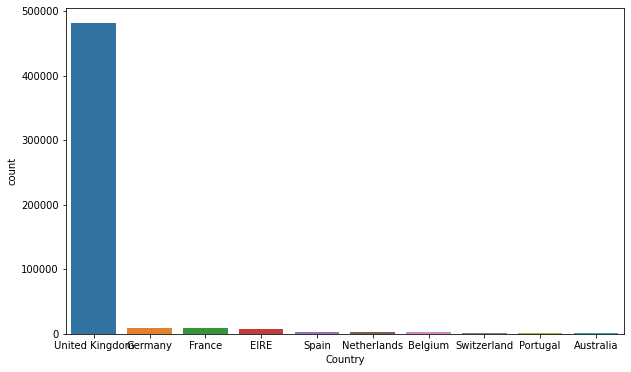

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().iloc[:10].index)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

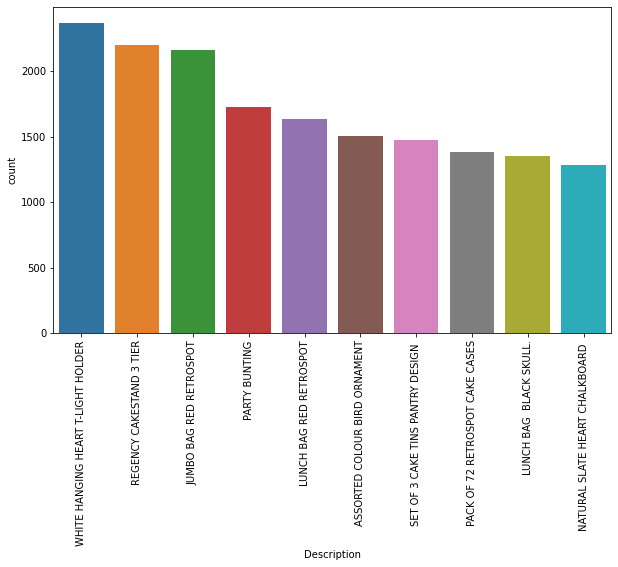

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Description', data=df, order=df['Description'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

In [44]:
df['year']=df['InvoiceDate'].dt.year
df['month']=df['InvoiceDate'].dt.month
df['date']=df['InvoiceDate'].dt.day
df['day_of_week']=df['InvoiceDate'].dt.weekday#monday is 0, sunday is 6
df['hour']=df['InvoiceDate'].dt.hour
df['min']=df['InvoiceDate'].dt.minute


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,year,month,date,day_of_week,hour,min
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,1,2,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,2,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,1,2,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,2,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,2,8,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,2011,12,9,4,12,50
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,2011,12,9,4,12,50
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,2011,12,9,4,12,50
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,2011,12,9,4,12,50


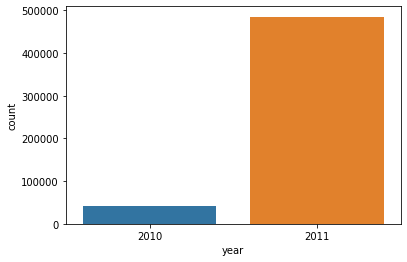

In [ ]:
sns.countplot(x='year',data=df)

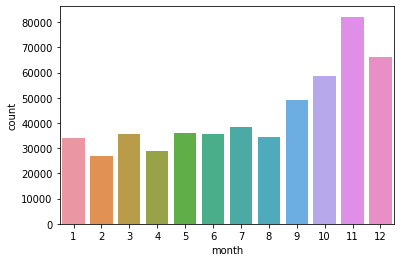

In [ ]:
sns.countplot(x='month', data=df)

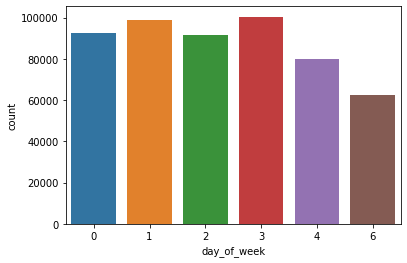

In [ ]:
sns.countplot(x='day_of_week',data=df)

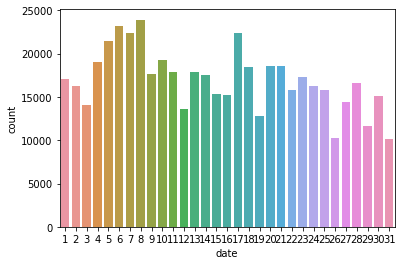

In [ ]:
sns.countplot(x='date',data=df)

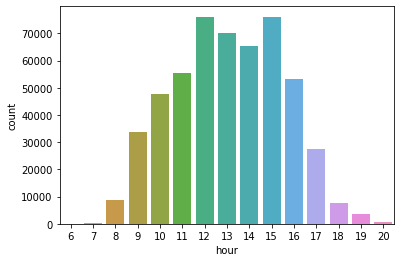

In [ ]:
sns.countplot(x='hour',data=df)

In [45]:
df['net_amount']=df['Quantity']*df['UnitPrice']

In [ ]:
country_amt=pd.DataFrame(df.groupby(['Country'])['net_amount'].mean()).sort_values(by='net_amount',ascending=False).reset_index()

<BarContainer object of 10 artists>

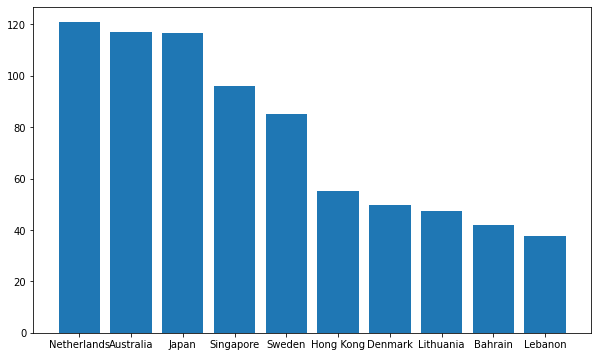

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x=country_amt['Country'].iloc[:10], height=country_amt['net_amount'].iloc[:10])

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,year,month,date,day_of_week,hour,min,net_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,1,2,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,2,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,1,2,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,2,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,2,8,26,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,2011,12,9,4,12,50,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,2011,12,9,4,12,50,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,2011,12,9,4,12,50,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,2011,12,9,4,12,50,16.60


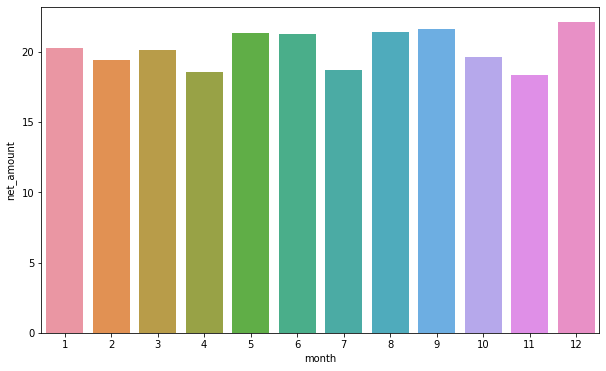

In [ ]:
monthly_amt=pd.DataFrame(df.groupby(['month'])['net_amount'].mean()).sort_values(by='net_amount',ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_amt['month'], y=monthly_amt['net_amount'])


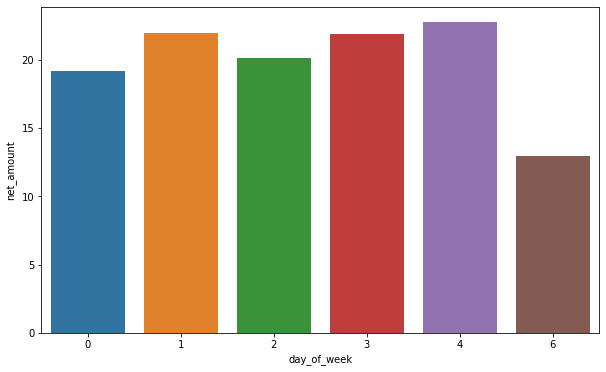

In [ ]:
weekday_amt=pd.DataFrame(df.groupby(['day_of_week'])['net_amount'].mean()).sort_values(by='net_amount',ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=weekday_amt['day_of_week'], y=weekday_amt['net_amount'])

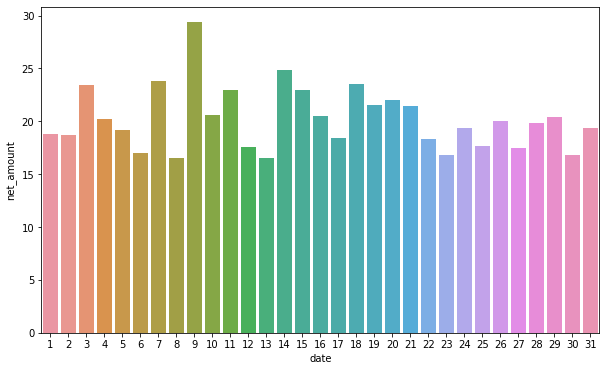

In [ ]:
date_amt=pd.DataFrame(df.groupby(['date'])['net_amount'].mean()).sort_values(by='net_amount',ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=date_amt['date'], y=date_amt['net_amount'])

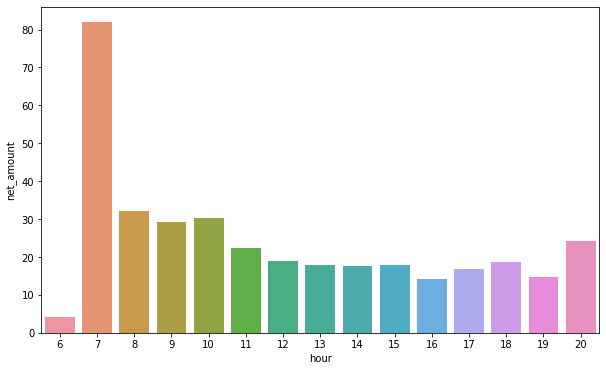

In [ ]:
hourly_amt=pd.DataFrame(df.groupby(['hour'])['net_amount'].mean()).sort_values(by='net_amount',ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_amt['hour'], y=hourly_amt['net_amount'])

In [46]:
cust_freq=df.groupby(['CustomerID']).InvoiceNo.count().reset_index()
cust_freq.rename(columns={'InvoiceNo':'Frequency'},inplace=True)

In [47]:
cust_trans=df.groupby(['CustomerID']).net_amount.sum().reset_index()
cust_trans.rename(columns={'net_amount':'total_amount'},inplace=True)

In [48]:
customer_info=pd.merge(cust_freq,cust_trans,on='CustomerID')

In [49]:
customer_info

,CustomerID,Frequency,total_amount
0,12346.0,1,77183.60
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40
...,...,...,...
4334,18280.0,10,180.60
4335,18281.0,7,80.82
4336,18282.0,12,178.05
4337,18283.0,721,2045.53


In [50]:
df['time_diff']=df['InvoiceDate'].max()-df['InvoiceDate']

In [51]:
time_diff_df=df.groupby(['CustomerID']).time_diff.min().reset_index()
time_diff_df.rename(columns={'time_diff':'recent_purchase'},inplace=True)
# time_diff_df

In [52]:
df_new=pd.merge(customer_info,time_diff_df, on='CustomerID')

In [53]:
df_new

,CustomerID,Frequency,total_amount,recent_purchase
0,12346.0,1,77183.60,325 days 02:49:00
1,12347.0,182,4310.00,1 days 20:58:00
2,12348.0,31,1797.24,74 days 23:37:00
3,12349.0,73,1757.55,18 days 02:59:00
4,12350.0,17,334.40,309 days 20:49:00
...,...,...,...,...
4334,18280.0,10,180.60,277 days 02:58:00
4335,18281.0,7,80.82,180 days 01:57:00
4336,18282.0,12,178.05,7 days 01:07:00
4337,18283.0,721,2045.53,3 days 00:48:00


In [54]:
df_new['recent_purchase'] = df_new['recent_purchase'].dt.days

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


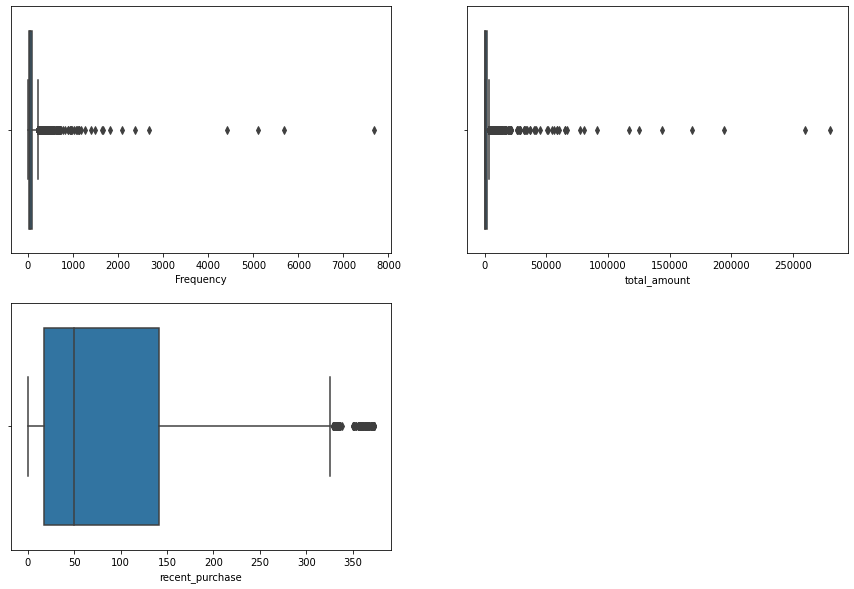

In [55]:
plt.figure(figsize=(15,10))
n =1;
for i in df_new.columns[1:]:
  plt.subplot(2,2,n)
  sns.boxplot(df_new[i])
  n+=1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


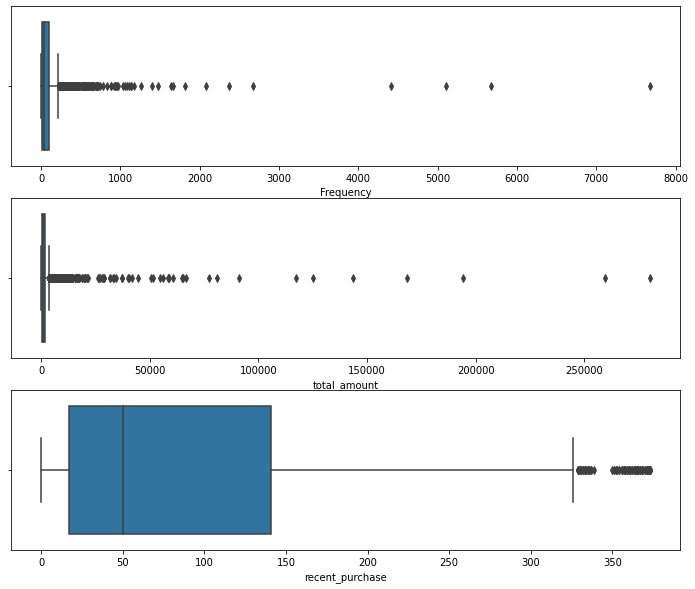

In [21]:
plt.figure(figsize=(12,10))

plt.subplot(3, 1, 1); 
sns.boxplot(df_new['Frequency'])

plt.subplot(3, 1, 2); 
sns.boxplot(df_new['total_amount'])

plt.subplot(3, 1, 3); 
sns.boxplot(df_new['recent_purchase'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


19.341402694657173

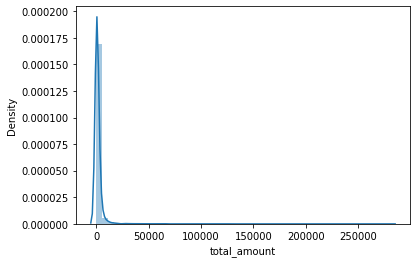

In [56]:
sns.distplot(df_new['total_amount'])
df_new['total_amount'].skew()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


18.04361895830862

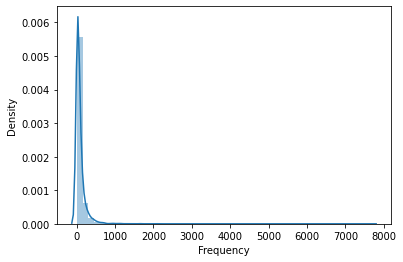

In [57]:
sns.distplot(df_new['Frequency'])
df_new['Frequency'].skew()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.2463568823921842

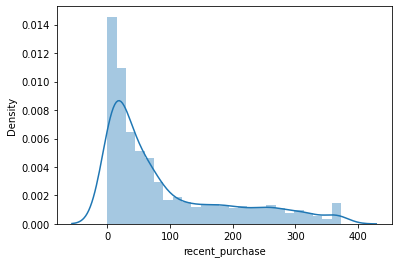

In [58]:
sns.distplot(df_new['recent_purchase'])
df_new['recent_purchase'].skew()

In [25]:
# df_new=df_new[df_new['total_amount']>0]

In [ ]:
# df_new['log_total_amount']= np.log10(df_new['total_amount'])



In [ ]:
# sns.distplot(df_new['log_total_amount'])

In [ ]:
# df_new['log_total_amount'].mean()- 3*df_new['log_total_amount'].std()

In [29]:
# df_new = df_new[df_new['log_total_amount']>(df_new['log_total_amount'].mean()- 3*df_new['log_total_amount'].std())]
# df_new = df_new[df_new['log_total_amount']>(df_new['log_total_amount'].mean()+ 3*df_new['log_total_amount'].std())]


In [ ]:
# sns.distplot(df_new['log_total_amount'])
# df_new['log_total_amount'].skew()

In [34]:
q1 = np.percentile(df_new['Frequency'],25)
q2 = np.percentile(df_new['Frequency'],50)
q3 = np.percentile(df_new['Frequency'],75)
iqr_f=q3 -q1
llimit_f=q1-(1.5*iqr_f)
ulimit_f=q3+(1.5*iqr_f)
df_new=df_new[df_new['Frequency']>llimit_f]
df_new=df_new[df_new['Frequency']<ulimit_f]

In [35]:
q1 = np.percentile(df_new['recent_purchase'],25)
q2 = np.percentile(df_new['recent_purchase'],50)
q3 = np.percentile(df_new['recent_purchase'],75)
iqr_r=q3 -q1
llimit_r=q1-(1.5*iqr_r)
ulimit_r=q3+(1.5*iqr_r)
df_new=df_new[df_new['recent_purchase']>llimit_r]
df_new=df_new[df_new['recent_purchase']<ulimit_r]

In [59]:
q1 = np.percentile(df_new['total_amount'],25)
q2 = np.percentile(df_new['total_amount'],50)
q3 = np.percentile(df_new['total_amount'],75)
iqr_t=q3 -q1
llimit_t=q1-(1.5*iqr_t)
ulimit_t=q3+(1.5*iqr_t)
df_new=df_new[df_new['total_amount']>llimit_t]
df_new=df_new[df_new['total_amount']<ulimit_t]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


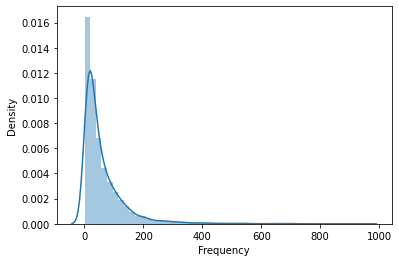

In [60]:
sns.distplot(df_new['Frequency'])

In [61]:
df_new.shape

(3914, 4)

In [62]:
df_new['Frequency_sqrt'] = df_new['Frequency'].apply(np.sqrt)
df_new['recent_purchase_sqrt'] = df_new['recent_purchase'].apply(np.sqrt)
df_new['total_amount_sqrt']=df_new['total_amount'].apply(np.sqrt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

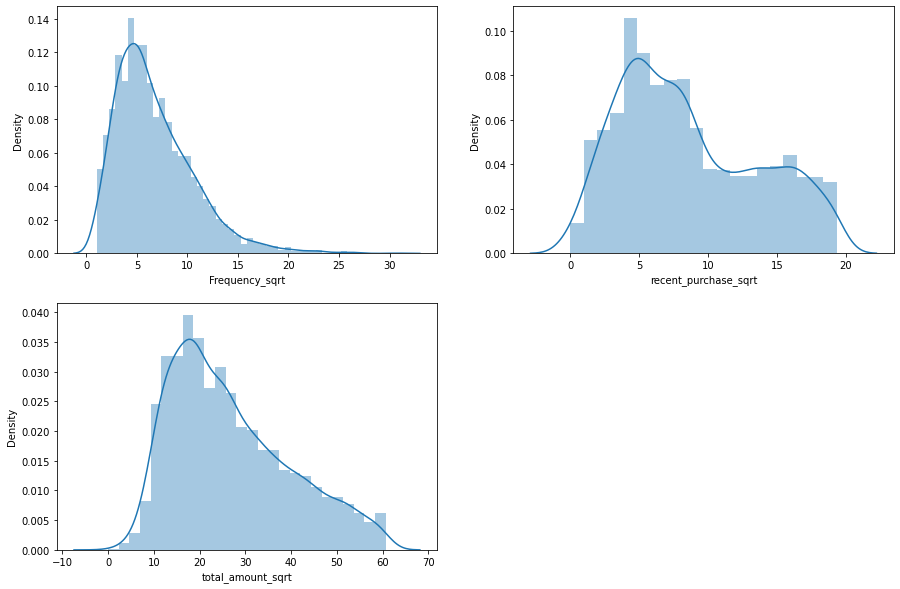

In [64]:
plt.figure(figsize=(15,10))
n =1;
for i in ['Frequency_sqrt','recent_purchase_sqrt','total_amount_sqrt']:
  plt.subplot(2,2,n)
  sns.distplot(df_new[i])
  n+=1

In [65]:
for i in ['Frequency_sqrt','recent_purchase_sqrt','total_amount_sqrt']:
  print(f'Coefficient of Skewness for {i} is {df_new[i].skew()}')

Coefficient of Skewness for Frequency_sqrt is 1.267185784630878
Coefficient of Skewness for recent_purchase_sqrt is 0.4722292329554294
Coefficient of Skewness for total_amount_sqrt is 0.6819168553652268


In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
required_df=df_new[['Frequency_sqrt','recent_purchase_sqrt','total_amount_sqrt']]
df_final=scaler.fit_transform(required_df)

In [67]:
df_final

array([[0.15341781, 0.44541152, 0.69847599],
       [0.25338096, 0.21967561, 0.6907204 ],
       [0.10489596, 0.91017484, 0.30128782],
       ...,
       [0.08276195, 0.13699181, 0.21984644],
       [0.86827415, 0.08968219, 0.74516315],
       [0.24742249, 0.33556003, 0.70621366]])

In [68]:
df_final=pd.DataFrame(df_final)

In [71]:
df_final.rename(columns={0:'Frequency_sqrt',1:'recent_purchase_sqrt',2:'total_amount_sqrt'},inplace=True)

In [72]:
df_final

,Frequency_sqrt,recent_purchase_sqrt,total_amount_sqrt
0,0.153418,0.445412,0.698476
1,0.253381,0.219676,0.690720
2,0.104896,0.910175,0.301288
3,0.276070,0.306323,0.824788
4,0.033587,0.737723,0.155433
...,...,...,...
3909,0.072625,0.861758,0.221415
3910,0.055276,0.694675,0.148118
3911,0.082762,0.136992,0.219846
3912,0.868274,0.089682,0.745163


In [74]:
from sklearn.cluster import KMeans
ssd = []
for i in range(1,23):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_final.iloc[:,:3])
    ssd.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Elbow Method')

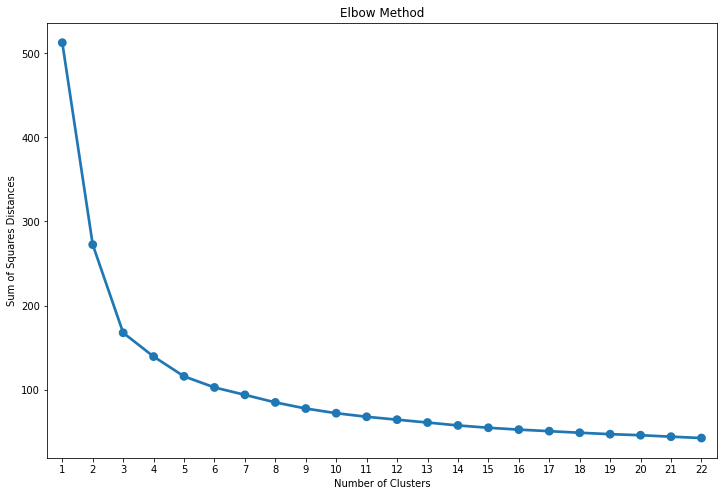

In [75]:
plt.figure(figsize=(12,8))
sns.pointplot(np.arange(1,23),ssd)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Distances')
plt.title('Elbow Method')

In [117]:
#let's check for k=6
kmeans = KMeans(n_clusters=6, max_iter=50)
kmeans.fit(df_final)

KMeans(max_iter=50, n_clusters=6)

In [118]:
df_final['ClusterNo'] = kmeans.labels_
df_final.head()

,Frequency_sqrt,recent_purchase_sqrt,total_amount_sqrt,ClusterNo
0,0.153418,0.445412,0.698476,5
1,0.253381,0.219676,0.690720,3
2,0.104896,0.910175,0.301288,0
3,0.276070,0.306323,0.824788,2
4,0.033587,0.737723,0.155433,0


In [119]:
df_final['ClusterNo'].value_counts()

0    882
4    732
3    704
1    622
2    537
5    437
Name: ClusterNo, dtype: int64

In [120]:
label=kmeans.labels_

In [121]:
label

array([5, 3, 0, ..., 1, 2, 3], dtype=int32)

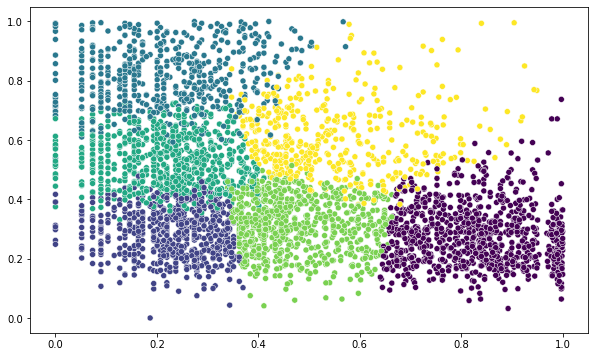

In [123]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=np.array(df_final)[:, 1],y=np.array(df_final)[:, 2], c=kmeans.labels_)

In [86]:
kmeans.cluster_centers_

array([[ 1.29286186e-01,  2.28933871e-01,  2.85642645e-01,
         2.00000000e+00],
       [ 2.53141011e-01,  2.20010210e-01,  5.26931106e-01,
         4.00000000e+00],
       [ 1.23133013e-01,  4.76711421e-01,  3.11104720e-01,
        -1.55431223e-14],
       [ 3.95400373e-01,  2.19376356e-01,  8.15096447e-01,
         1.00000000e+00],
       [ 1.04356749e-01,  8.29179913e-01,  2.77522436e-01,
         3.00000000e+00],
       [ 2.36423556e-01,  5.51134152e-01,  6.09971053e-01,
         5.00000000e+00]])

In [88]:
from collections import Counter
Counter(kmeans.labels_)


Counter({5: 437, 1: 704, 4: 882, 3: 537, 2: 732, 0: 622})

In [90]:
from sklearn.model_selection import GridSearchCV

In [94]:
cluster.best_params_

{'max_iter': 200, 'n_clusters': 22}